In [1]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
#Defining the ODE
def func(PM,t,A_p,a,j,k,K_m,S_e,v_m,V,W,y,z):
    P,P_b,P_u,S = PM
    dPdt = y - k*S_e*P - k/W*S*P + j*P_b
    dP_bdt = k*S_e*P + k/W*S*P - j*P_b - a*P_b
    dP_udt = a*P_b - z*P_u
    dSdt = -k/W*S*(A_p/V)*P + (j+a)*(A_p/V)*P_b +  - v_m*S/(V*(K_m + S))
    dydt = [dPdt, dP_bdt, dP_udt, dSdt]
    return dydt

In [3]:
#Defining Variables
a = 1
A_p = 314
j = 10**2
K_d = 0.74
K_m = 2.5
k = j/K_d
v_m = 8.8 * 10**3
V = 523
W = 32
y = 0.000083
z = .002

In [4]:
#Setting Initial Condition and Timespan
y0 = [1,0,0,0]
t = np.linspace(0,100000,1000000)

0.006188986423112429
0.0003101347560038396
0.0001240626001472921


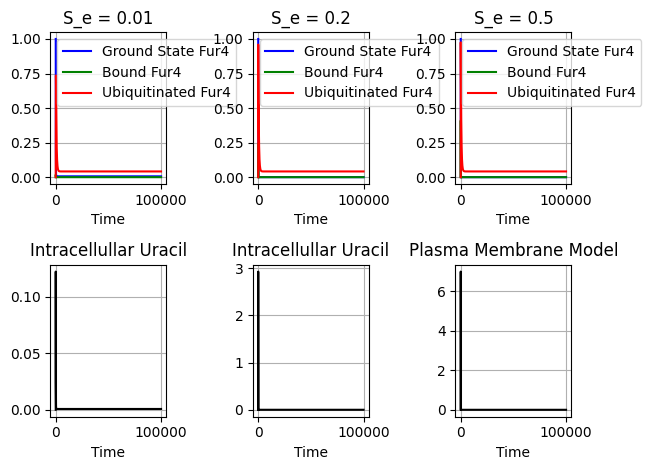

In [6]:
#Defining extracellular uracil rates
rates = [0.01,0.2,0.5,0.5,.7,1,5,10,20]
#Ranging through the rates
for i in range(3):
    #Defining extracellular uracil
    S_e = rates[i]
    #Defining Subplot
    plt1 = plt.subplot(int(f"23{i+1}"))
    #Solving the ODE
    sol = odeint(func,y0,t,args = (A_p,a,j,k,K_m,S_e,v_m,V,W,y,z))
    #Plotting the Solution
    plt1.plot(t,sol[:,0],'b',label = "Ground State Fur4")
    plt1.plot(t,sol[:,1],'g',label = "Bound Fur4")
    plt1.plot(t,sol[:,2],'r',label = "Ubiquitinated Fur4")
    plt1.set_xlabel("Time")
    plt.legend()
    plt.grid()
    plt1.set_title(f"S_e = {S_e}")
    plt2 = plt.subplot(int(f"23{i+4}"))
    plt2.plot(t,sol[:,3],'k',label = "Intracellullar Uracil")
    plt2.set_xlabel("Time")
    plt2.set_title("Intracellullar Uracil")
    #Graph Layout
    plt.grid()
    print(sol[:,0][-1])

plt.tight_layout()
plt.title("Plasma Membrane Model")
plt.show()